<center><font size="16"> Titanic: Machine Learning from Disaster</font></center>

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this notebook, we will see how to dig deep into the data and visualize it.

### Data

- Titanic data (titanic_data.csv)

### Data Dictionary

<center>
<table class="table table-bordered">
<tr>
<th style="width:5%">Variable</th><th style="width:5%">Definition</th><th style="width:5%">Key</th>
</tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</table>
</center>

# Wrangling & EDA

## 1. Loading Packages

In [199]:
# Importing "Pandas" , "Numpy" , "Matplotlib" and "Seaborn" libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # to set theme of plot
%matplotlib inline 
# %(magic command) to IDE that use interactive python. Jupites implements interactive python. 

## 2. Loading Data & Basic Analysis

In [200]:
# Importing and reading "Titanic Dataset"

data = pd.read_csv('titanic_unclean_data.csv')
dftitanic = data.copy()

### Basic Structure

In [201]:
# Checking the number of values in "Titanic Dataset" using "Shape()" function.

dftitanic.shape

(891, 12)

In [202]:
# Examining the Top 10 Rows/Values of "Titanic Dataset" using "head()" function. 

dftitanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [203]:
# Examining the data types if columns values of "Titanic Dataset" using "dtypes" function.

dftitanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [204]:
# Examining the Dataset by applying Statistical formula using "describe()" function.

dftitanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [205]:
dftitanic.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Moore, Mr. Leonard Charles",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [206]:
dftitanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Moore, Mr. Leonard Charles",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Completeness

In [207]:
# Examining the Dataset and counting number of Null values in "Titanic Dataset" using "isnull().sum()" function 

dftitanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. Exploration

### 3.1 Exploration of Complete & Important Variables

Our response variable in the training set is complete, as well as Sex and Pclass, which seem two of the most important predictors.

**Survival**

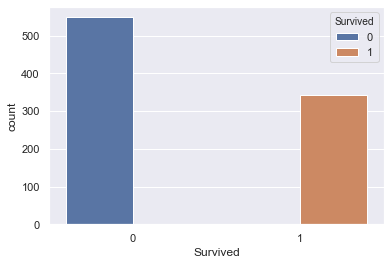

In [208]:
sns.countplot(x='Survived', hue='Survived', data=dftitanic);

**Gender & Survival**

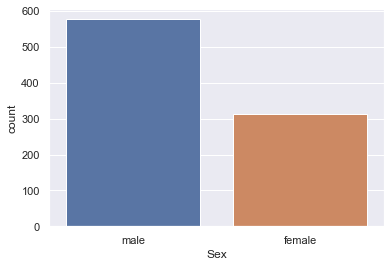

In [209]:
sns.countplot(x='Sex', data=dftitanic);

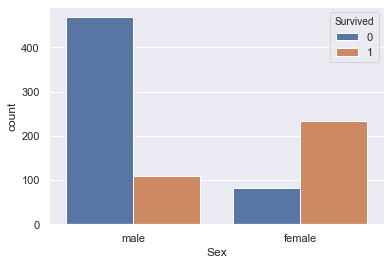

In [210]:
sns.countplot(x='Sex', hue='Survived', data=dftitanic);

### Passenger Survival Class

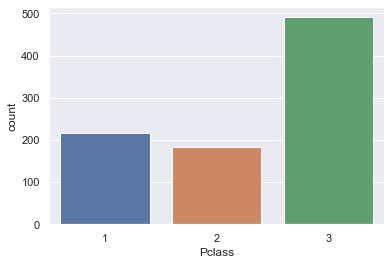

In [211]:
sns.countplot(x='Pclass', data=dftitanic);

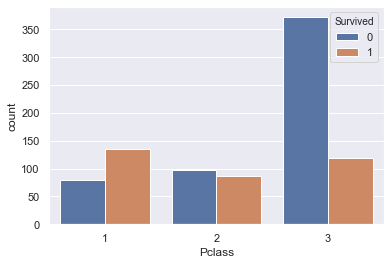

In [212]:
sns.countplot(x='Pclass', hue='Survived', data=dftitanic);

**Passenger Class, Gender & Survival**

C:\Users\Muhammad Arsalan Akr\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


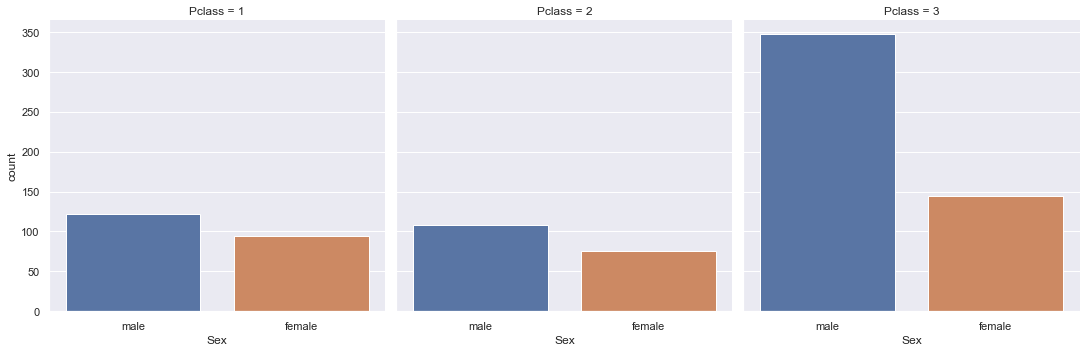

In [213]:
sns.factorplot(x='Sex', col='Pclass', data=dftitanic, kind='count');

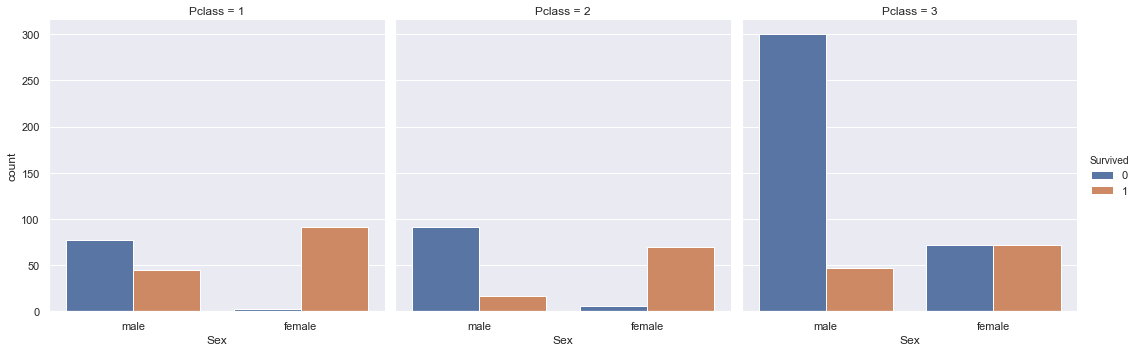

In [214]:
sns.factorplot(x='Sex', col='Pclass', hue='Survived', data=dftitanic, kind='count')

### 3.2 What's in the name?

In [215]:
dftitanic['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

**Extracting & Analyzing Titles**

This is called feature engineering where you derive additional columns as per your domain knowledge like creating 'Title in the following example.

In [216]:
import re  # regular expression re
a='Braund, Mr.Owen Harris'
re.search(' ([A-Z][a-z]+)\.', a).group(1)

'Mr'

In [217]:
dftitanic['Title'] = dftitanic['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
dftitanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [218]:
dftitanic['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Countess      1
Jonkheer      1
Mme           1
Lady          1
Capt          1
Don           1
Ms            1
Name: Title, dtype: int64

The term *Mademoiselle* is a French familiar title, abbreviated **Mlle**, traditionally given to an unmarried woman. The equivalent in English is "Miss". However, the courtesy title "Madame" is accorded women where their marital status is unknown.

In [219]:
dftitanic['Title'] = dftitanic['Title'].replace('Mlle', 'Miss')

In France, one traditionally calls a young, unmarried woman Mademoiselle – Mlle for short – and an older, married woman _Madame_, whose abbreviation is **Mme**.

In [220]:
dftitanic['Title'] = dftitanic['Title'].replace('Mme', 'Mrs')

In [221]:
(~dftitanic['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master']))

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Name: Title, Length: 891, dtype: bool

In [222]:
dftitanic.loc[0:77, 'Title']

0       Mr
1      Mrs
2     Miss
3      Mrs
4       Mr
      ... 
73      Mr
74      Mr
75      Mr
76      Mr
77      Mr
Name: Title, Length: 78, dtype: object

In [223]:
dftitanic.loc[(~dftitanic['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])), 'Title'] = 'Rare Title'

In [224]:
dftitanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare Title'], dtype=object)

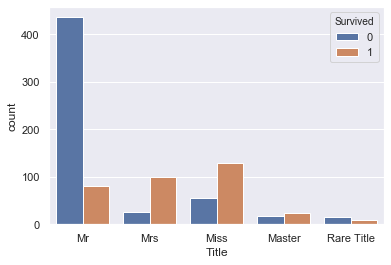

In [225]:
sns.countplot(data=dftitanic,x='Title', hue='Survived');

### 3.3 Travelling Alone vs. Travelling in groups

**3.3.1 Family Size**

In [226]:
dftitanic['Fsize'] = dftitanic['SibSp'] + dftitanic['Parch']+1
dftitanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare Title,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1


Show the countplot on column **'Fsize'** and check how many people are survived and died.

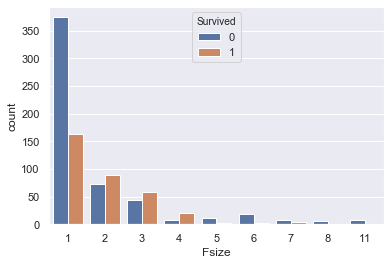

In [227]:
# Plotting the Family Size

sns.countplot(data=dftitanic,x='Fsize', hue='Survived');

In [228]:
dftitanic.groupby('Fsize')['Survived'].value_counts(normalize=True).reset_index(name='perc') 
# normalize =true calculates percentage

,Fsize,Survived,perc
0,1,0,0.696462
1,1,1,0.303538
2,2,1,0.552795
3,2,0,0.447205
4,3,1,0.578431
5,3,0,0.421569
6,4,1,0.724138
7,4,0,0.275862
8,5,0,0.800000
9,5,1,0.200000


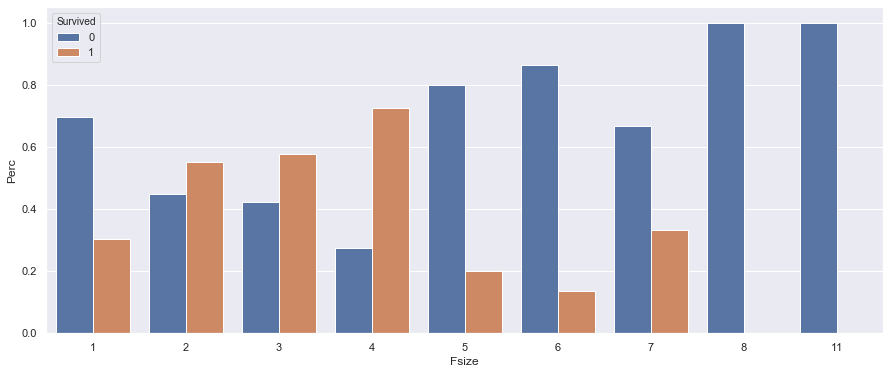

In [229]:
temp = dftitanic.groupby('Fsize')['Survived'].value_counts(normalize=True).reset_index(name='Perc')
plt.figure(figsize=(15,6));
sns.barplot(data=temp,x='Fsize', y='Perc', hue='Survived', dodge=True);

**3.3.2 How many people booked together?**

_Apart from families, there could be groups of friends travelling together._

In [230]:
dftitanic['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [231]:
dftitanic['Ticket'].value_counts().head()

CA. 2343    7
347082      7
1601        7
3101295     6
CA 2144     6
Name: Ticket, dtype: int64

**reset_index()** is a method to reset index of a Data Frame. **reset_index()** method sets a list of integer ranging from 0 to length of data as index.

In [232]:
dftitanic['Ticket'].value_counts().reset_index().head()

,index,Ticket
0,CA. 2343,7
1,347082,7
2,1601,7
3,3101295,6
4,CA 2144,6


In [233]:
temp = dftitanic['Ticket'].value_counts().reset_index(name='Tsize') # introduces index
temp

,index,Tsize
0,CA. 2343,7
1,347082,7
2,1601,7
3,3101295,6
4,CA 2144,6
...,...,...
676,250648,1
677,370377,1
678,237671,1
679,A/5. 3337,1


In [234]:
dftitanic = dftitanic.merge(temp, left_on='Ticket', right_on='index',how='inner').drop('index', axis=1) 
# merged two tables , both have a common column of Ticket. 
dftitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,Mr,2,2


Show the countplot on column **'Tsize'** and check how many people are survived and died.

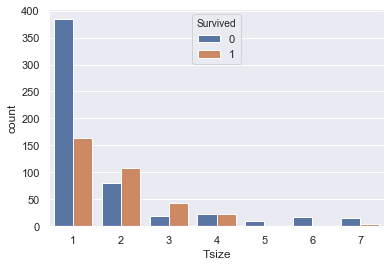

In [235]:

sns.countplot(data=dftitanic,x='Tsize', hue='Survived');

In [236]:
temp = dftitanic.groupby('Tsize')['Survived'].value_counts(normalize=True).reset_index(name='Perc')

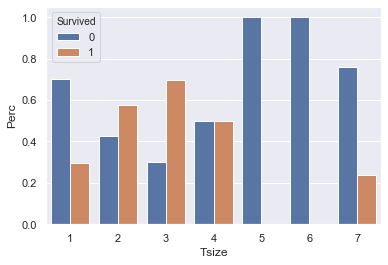

In [237]:
sns.barplot(x='Tsize', y='Perc', hue='Survived', data=temp, dodge=True);

**3.3.3 Consolidating family & friends**

In [238]:
dftitanic[['Tsize', 'Fsize']].max(axis=1) # picking maximum of both in tsize and fsize


0      2
1      2
2      1
3      2
4      2
      ..
886    1
887    1
888    1
889    1
890    1
Length: 891, dtype: int64

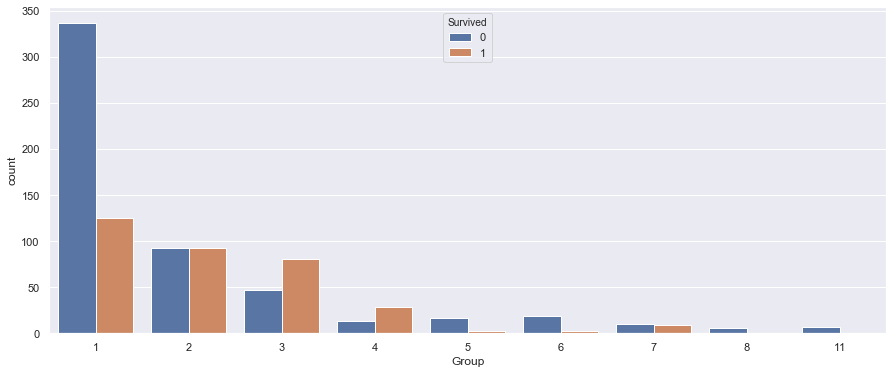

In [239]:
dftitanic['Group'] = dftitanic[['Tsize', 'Fsize']].max(axis=1) # creating a new colum group

plt.figure(figsize=(15,6));
sns.countplot(x='Group', hue='Survived', data=dftitanic);

In [240]:
dftitanic['GrpSize'] = ''
dftitanic.loc[dftitanic['Group']==1, 'GrpSize'] = dftitanic.loc[dftitanic['Group']==1, 'GrpSize'].replace('', 'solo')
dftitanic.loc[dftitanic['Group']==2, 'GrpSize'] = dftitanic.loc[dftitanic['Group']==2, 'GrpSize'].replace('', 'couple')
dftitanic.loc[(dftitanic['Group']<=4) & (dftitanic['Group']>=3), 'GrpSize'] = dftitanic.loc[(dftitanic['Group']<=4) & (dftitanic['Group']>=3), 'GrpSize'].replace('', 'group')
dftitanic.loc[dftitanic['Group']>4, 'GrpSize'] = dftitanic.loc[dftitanic['Group']>4, 'GrpSize'].replace('', 'large group')
dftitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2,couple
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,couple
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,couple
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,Mr,2,2,2,couple


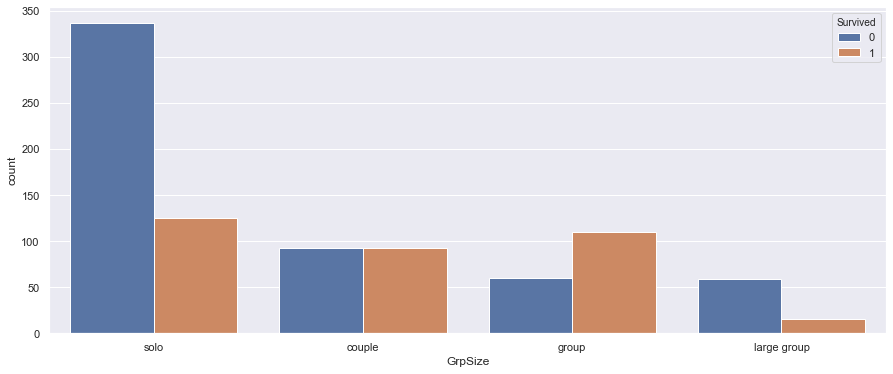

In [241]:
plt.figure(figsize=(15,6));
sns.countplot(x='GrpSize', order=['solo', 'couple', 'group', 'large group'], hue='Survived', data=dftitanic);

### 3.4 Effect of Fare

**Task 16:**
Check the null values of fare

In [242]:
dftitanic["Fare"].isnull().sum()

0

In [243]:
dftitanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2,couple
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,couple
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,couple
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,Mr,2,2,2,couple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr,1,1,1,solo
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare Title,1,1,1,solo
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,1,1,solo
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,1,1,solo


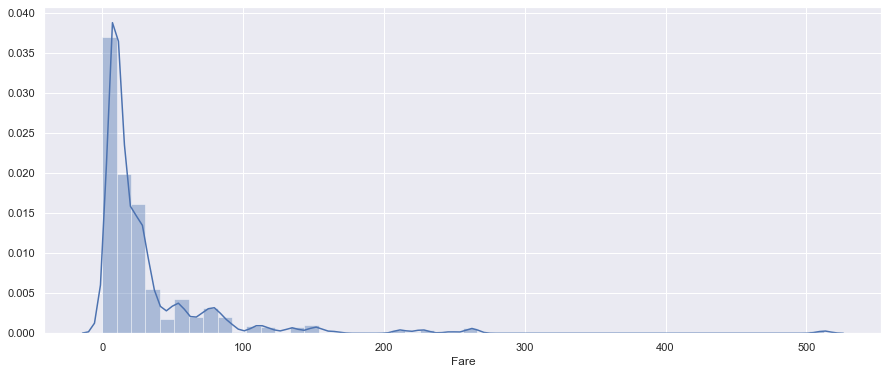

In [244]:
plt.subplots(figsize=(15,6))
sns.distplot(dftitanic['Fare'],kde=True);

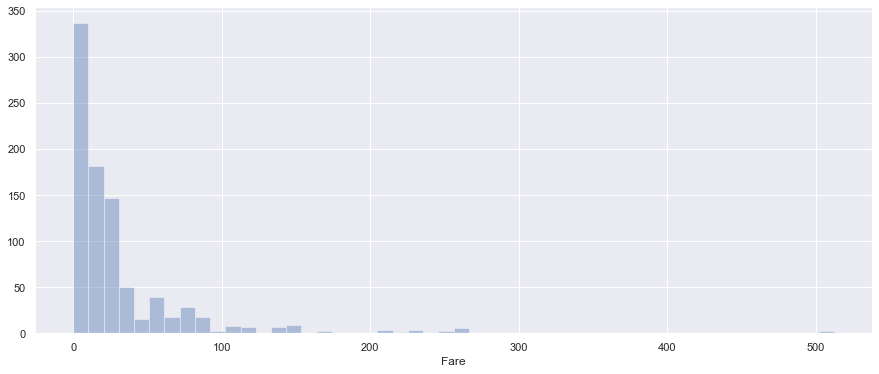

In [245]:
plt.subplots(figsize=(15,6))
sns.distplot(dftitanic['Fare'],kde=False);

In [246]:
dftitanic[dftitanic['Fare'] < 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize


In [247]:
dftitanic[dftitanic['Fare'] == 0] # there are null values in fare, so we will replace null values.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
266,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
267,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
268,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
269,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
366,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr,1,1,1,solo
386,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Mr,1,3,3,group
387,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Mr,1,3,3,group
388,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Mr,1,3,3,group
592,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Mr,1,1,1,solo
715,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,Mr,1,1,1,solo


In [248]:
# we replace null values with median value of their respective class.
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 1), 'Fare'] = dftitanic[dftitanic['Pclass'] == 1]['Fare'].median()
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 2), 'Fare'] = dftitanic[dftitanic['Pclass'] == 2]['Fare'].median()
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 3), 'Fare'] = dftitanic[dftitanic['Pclass'] == 3]['Fare'].median()

In [249]:
dftitanic[dftitanic['Fare']==0] # no more null values in fare now.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize


Assigning categories to fare

In [250]:
dftitanic['FareCat'] = ''
dftitanic.loc[dftitanic['Fare']<=10, 'FareCat'] = '0-10'
dftitanic.loc[(dftitanic['Fare']>10) & (dftitanic['Fare']<=25), 'FareCat'] = '10-25'
dftitanic.loc[(dftitanic['Fare']>25) & (dftitanic['Fare']<=40), 'FareCat'] = '25-40'
dftitanic.loc[(dftitanic['Fare']>40) & (dftitanic['Fare']<=70), 'FareCat'] = '40-70'
dftitanic.loc[(dftitanic['Fare']>70) & (dftitanic['Fare']<=100), 'FareCat'] = '70-100'
dftitanic.loc[dftitanic['Fare']>100, 'FareCat'] = '100+'
dftitanic[['Fare', 'FareCat']].head(10)

,Fare,FareCat
0,7.2500,0-10
1,71.2833,70-100
2,7.9250,0-10
3,53.1000,40-70
4,53.1000,40-70
5,8.0500,0-10
6,8.4583,0-10
7,51.8625,40-70
8,21.0750,10-25
9,21.0750,10-25


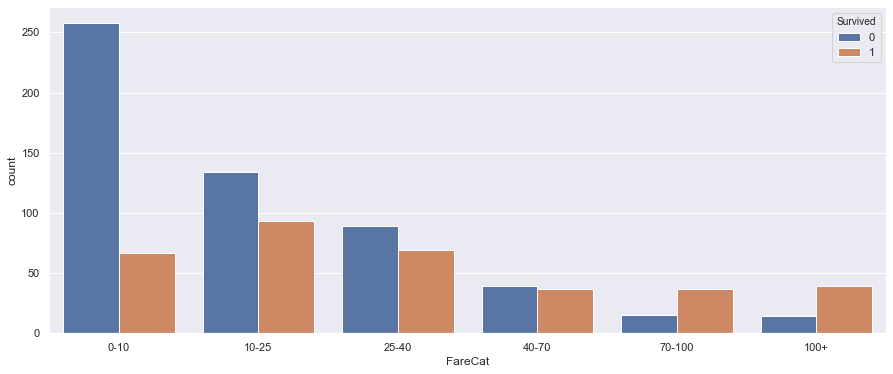

In [251]:
plt.subplots(figsize=(15,6))
sns.countplot(x='FareCat', order=['0-10', '10-25', '25-40', '40-70', '70-100', '100+'], hue='Survived', data=dftitanic);

In [252]:
#write the code to find the median
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 1), 'Fare'] = dftitanic[dftitanic['Pclass'] == 1]['Fare'].median()
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 2), 'Fare'] = dftitanic[dftitanic['Pclass'] == 2]['Fare'].median()
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 3), 'Fare'] = dftitanic[dftitanic['Pclass'] == 3]['Fare'].median()


### 3.5 Effect of Embarked variable

_C = Cherbourg(France), Q = Queenstown(Ireland), S = Southampton(England)_

***Engineered Features***

In [253]:
dftitanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2,couple,0-10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,couple,70-100


## 4. Missing Values

### 4.1 Age

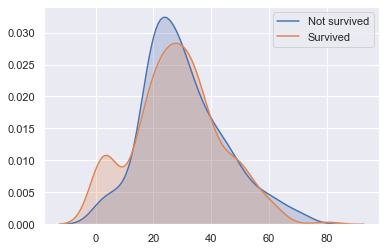

In [254]:
sns.kdeplot(dftitanic[dftitanic['Survived'] == 0]['Age'].dropna(), shade=True,label="Not survived");
sns.kdeplot(dftitanic[dftitanic['Survived'] == 1]['Age'].dropna(), shade=True,label="Survived");
plt.legend()

In [255]:
temp = dftitanic[dftitanic['Age'].isnull() == False]

C:\Users\Muhammad Arsalan Akr\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


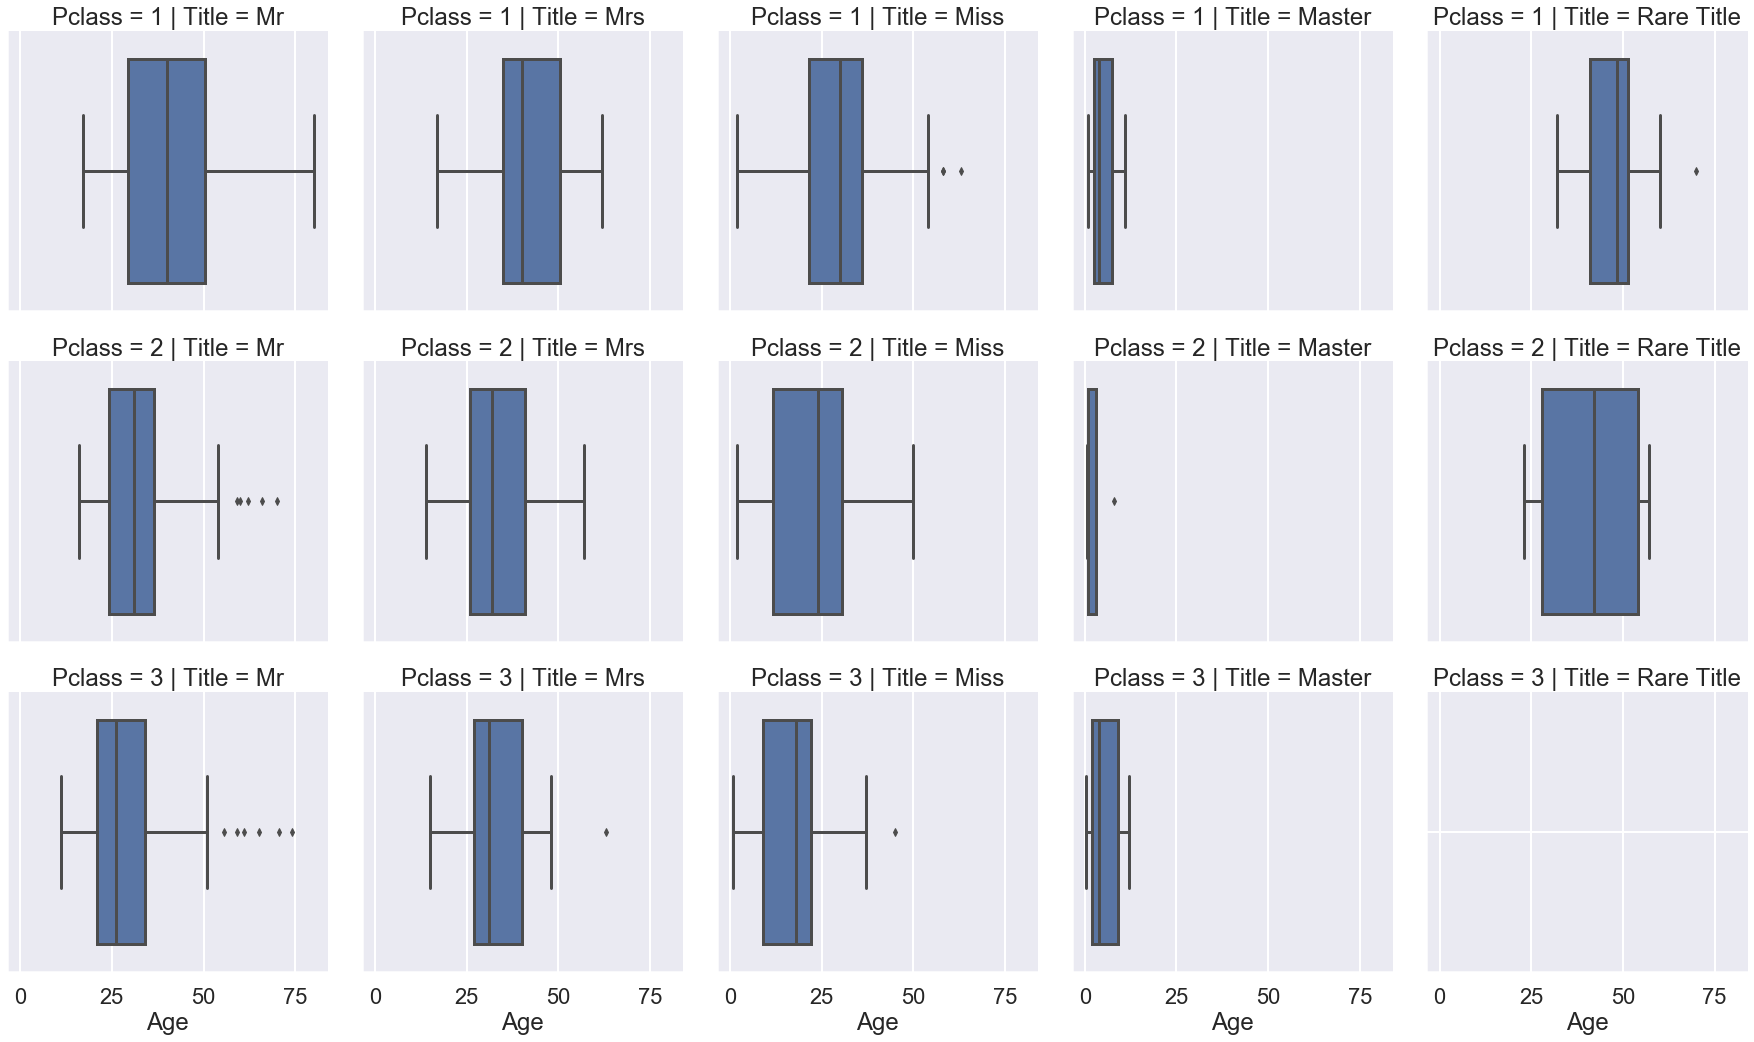

In [256]:
sns.set_context('poster')
sns.factorplot(kind='box', x='Age', col='Title', row='Pclass', data=temp);

In [257]:
for t in dftitanic['Title'].unique():
    for p in dftitanic['Pclass'].unique():
        dftitanic.loc[(dftitanic['Title'] == t) & (dftitanic['Pclass'] == p) & (dftitanic['Age'].isnull()), 'Age'] = dftitanic.loc[(dftitanic['Title'] == t) & (dftitanic['Pclass'] == p), 'Age'].median()

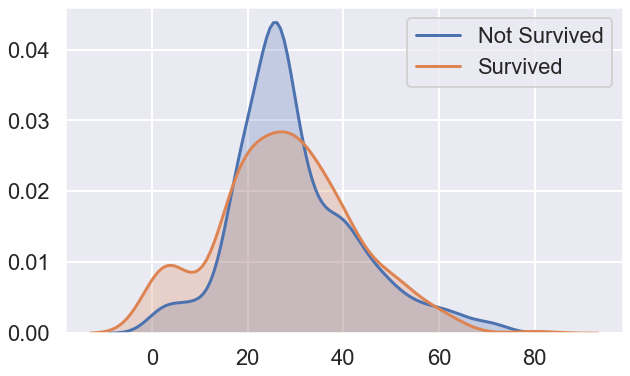

In [258]:
plt.subplots(figsize=(10,6))
sns.kdeplot(dftitanic[dftitanic['Survived'] == 0]['Age'], shade=True,label='Not Survived');
sns.kdeplot(dftitanic[dftitanic['Survived'] == 1]['Age'], shade=True,label='Survived');
plt.legend()

Creating Age categories

In [259]:
dftitanic['AgeCat']=''
dftitanic.loc[ dftitanic['Age'] <= 16, 'AgeCat'] = '0-16'
dftitanic.loc[(dftitanic['Age'] > 16) & (dftitanic['Age'] <= 32), 'AgeCat'] = '16-32'
dftitanic.loc[(dftitanic['Age'] > 32) & (dftitanic['Age'] <= 48), 'AgeCat'] = '32-48'
dftitanic.loc[(dftitanic['Age'] > 48) & (dftitanic['Age'] <= 64), 'AgeCat'] = '48-64'
dftitanic.loc[ dftitanic['Age'] > 64, 'AgeCat']= '64+'

In [260]:
dftitanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize,FareCat,AgeCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2,couple,0-10,16-32
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,couple,70-100,32-48
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,solo,0-10,16-32
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,couple,40-70,32-48
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,Mr,2,2,2,couple,40-70,32-48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr,1,1,1,solo,0-10,16-32
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare Title,1,1,1,solo,10-25,16-32
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,1,1,solo,25-40,16-32
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,1,1,solo,25-40,16-32


### 4.2 Embarkment and null values

In [261]:
dftitanic.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked,Title,GrpSize,FareCat,AgeCat
count,891,891,891,204,889,891,891,891,891
unique,891,2,681,147,3,5,4,6,5
top,"Barkworth, Mr. Algernon Henry Wilson",male,CA. 2343,G6,S,Mr,solo,0-10,16-32
freq,1,577,7,4,644,517,462,325,490


In [262]:
dftitanic['Embarked'].isnull().sum()

2

In [263]:
dftitanic.loc[(dftitanic['Embarked'].isnull()),'Embarked']='S'

### 4.3 Dropping Cabin

Defining the cabin type

In [264]:
dftitanic['CabinType'] = dftitanic['Cabin'].str[0]
dftitanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize,FareCat,AgeCat,CabinType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2,couple,0-10,16-32,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,couple,70-100,32-48,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,solo,0-10,16-32,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,couple,40-70,32-48,C
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,Mr,2,2,2,couple,40-70,32-48,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr,1,1,1,solo,0-10,16-32,NaN
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare Title,1,1,1,solo,10-25,16-32,NaN
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,1,1,solo,25-40,16-32,B
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,1,1,solo,25-40,16-32,C


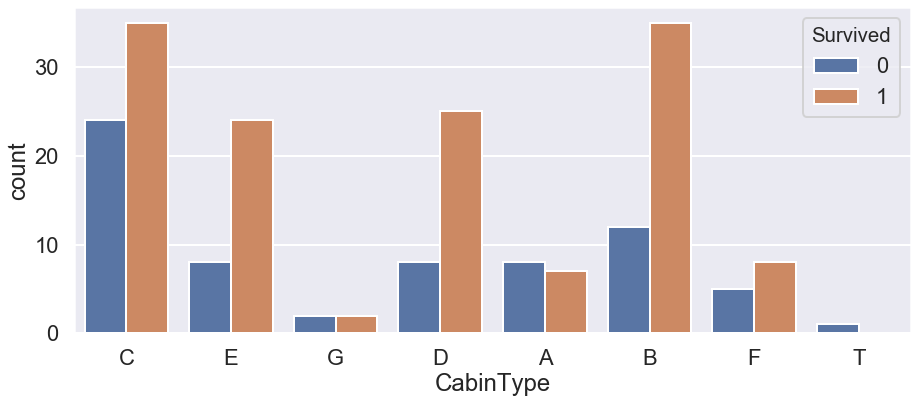

In [265]:
plt.figure(figsize=(15,6))
sns.countplot(x='CabinType', hue='Survived', data=dftitanic);

Dropping Cabin

In [266]:
dftitanic.groupby(['CabinType', 'Pclass'])['Pclass'].count()

CabinType  Pclass
A          1         15
B          1         47
C          1         59
D          1         29
           2          4
E          1         25
           2          4
           3          3
F          2          8
           3          5
G          3          4
T          1          1
Name: Pclass, dtype: int64

In [267]:
dftitanic.drop('Cabin',axis=1,inplace=True)

In [268]:
dftitanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fsize,Tsize,Group,GrpSize,FareCat,AgeCat,CabinType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2,1,2,couple,0-10,16-32,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2,1,2,couple,70-100,32-48,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,1,1,solo,0-10,16-32,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,2,2,2,couple,40-70,32-48,C
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,S,Mr,2,2,2,couple,40-70,32-48,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,Mr,1,1,1,solo,0-10,16-32,NaN
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rare Title,1,1,1,solo,10-25,16-32,NaN
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,1,1,1,solo,25-40,16-32,B
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,1,1,1,solo,25-40,16-32,C


## 5. Feature Selection

In [269]:
sns.set_context('poster')

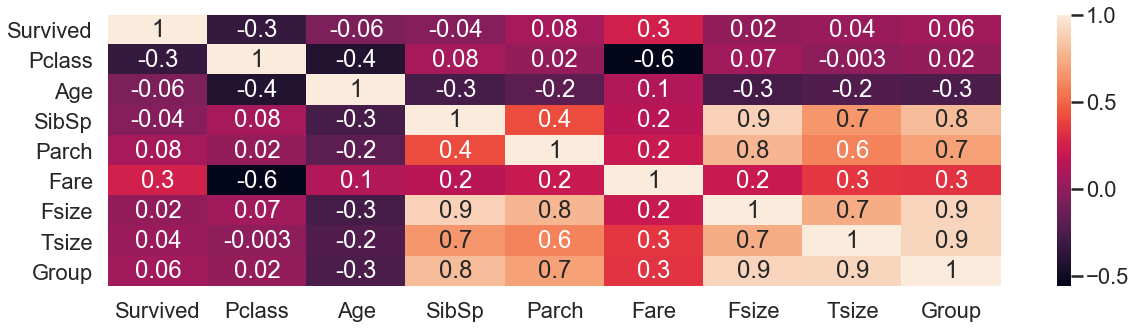

In [270]:
sns.set_context('poster')
plt.figure(figsize=(20,5))
cor = dftitanic.drop('PassengerId',axis=1).corr()
sns.heatmap(cor, annot=True, fmt='.1g');

The above heat map shows the corelation of different columns with eachother. A heatmap often helps to view the corelation as seen above. Looking at the above heatmap we can conclude that which attributes or columns are corelated and and can be removed to get a better shaped dataset.

The following points are to be considered for dropping the columns

- **'Group'** holds a corelation of 0.9 with **'Fsize'** and **'Tsize'**. So we will remove **'Group'** and **'Tsize'** because related data can be found in **'GrpSize'**.
- **'Fsize'** still has a corelation of 0.9  with **'SibSp'** and 0.8 with **'Parch'**.So we will remove 'Fsize' because **'SibSp'** and **'Parch'** are providing the required information.
- The **'Name'** column can also be removed because **'Title'** has been extracted.
- Similarly **'Age'** and **'Fare'** can also be removed because **'AgeCat'** and **'FareCat'** provide the related information.

So the final columns to be dropped are: 'Name','Age','Fare','Ticket','Fsize','Tsize' and 'Group'


In [271]:
drop_features = ['Name','Age','Fare','Ticket','Fsize','Tsize','Group']

Selecting final features

In [272]:
dftitanic.drop(drop_features,axis=1,inplace=True)
dftitanic

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat,CabinType
0,1,0,3,male,1,0,S,Mr,couple,0-10,16-32,NaN
1,2,1,1,female,1,0,C,Mrs,couple,70-100,32-48,C
2,3,1,3,female,0,0,S,Miss,solo,0-10,16-32,NaN
3,4,1,1,female,1,0,S,Mrs,couple,40-70,32-48,C
4,138,0,1,male,1,0,S,Mr,couple,40-70,32-48,C
...,...,...,...,...,...,...,...,...,...,...,...,...
886,885,0,3,male,0,0,S,Mr,solo,0-10,16-32,NaN
887,887,0,2,male,0,0,S,Rare Title,solo,10-25,16-32,NaN
888,888,1,1,female,0,0,S,Miss,solo,25-40,16-32,B
889,890,1,1,male,0,0,C,Mr,solo,25-40,16-32,C


Exporting final dataset in csv file

In [273]:
dftitanic.to_csv('titanic_clean_data.csv',index=False)